In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [12]:
df = pd.read_csv('/Users/chrisgoyette/Desktop/Data_Projects/StockX/StockX_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [86]:
# Shape of the data
df.shape

(99956, 8)

In [28]:
# looking at the data to get an idea of what we are working with
df.sample(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
66513,11/26/18,Yeezy,Adidas-Yeezy-Boost-350-V2-Zebra,$274,$220,2/25/17,10.0,New York
38434,7/17/18,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,$266,$220,6/30/18,11.0,New York
28744,6/4/18,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,$906,$190,6/23/18,10.0,Colorado
87791,1/9/19,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,$224,$220,6/30/18,11.0,Connecticut
37109,7/11/18,Yeezy,Adidas-Yeezy-Boost-350-V2-Blue-Tint,$405,$220,12/16/17,13.0,New Jersey
13921,1/4/18,Yeezy,Adidas-Yeezy-Boost-350-V2-Zebra,$580,$220,2/25/17,11.0,California
21556,3/26/18,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,$450,$220,11/25/17,6.0,New Jersey
14204,1/6/18,Yeezy,Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,$640,$220,11/18/17,8.5,Hawaii
69254,12/2/18,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$239,$220,4/29/17,10.5,Louisiana
87911,1/9/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$416,$220,12/26/18,6.0,New York


## Data Cleaning

In [36]:
# Lets do some data cleaning
# removing dollar signs and commas

df['Sale Price'] = df['Sale Price'].str.replace('[$,]', '', regex=True)
df['Sale Price']

0        1097
1         685
2         690
3        1075
4         828
         ... 
99951     565
99952     598
99953     605
99954     650
99955     640
Name: Sale Price, Length: 99956, dtype: object

In [38]:
# Now that we removed the dollar signs and commas lets convert to a numeric datatype

df['Sale Price'] = pd.to_numeric(df['Sale Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  int64  
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ MB


In [40]:
# More cleaning
# Convert Order Date from object to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  int64         
 4   Retail Price  99956 non-null  object        
 5   Release Date  99956 non-null  object        
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.1+ MB


In [ ]:
# More cleaning
df['Retail Price'] = df['Retail Price'].str.replace('[$,]', '', regex=True)
df['Retail Price'] = pd.to_numeric(df['Retail Price'])



In [51]:
# More cleaning
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  int64         
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 6.1+ MB


In [71]:
# More cleaning (removing leading and trailing spaces)

df['Brand'] = df['Brand'].str.strip()
df['Brand'].value_counts()

Brand
Yeezy        72162
Off-White    27794
Name: count, dtype: int64

## Exploratory Analysis

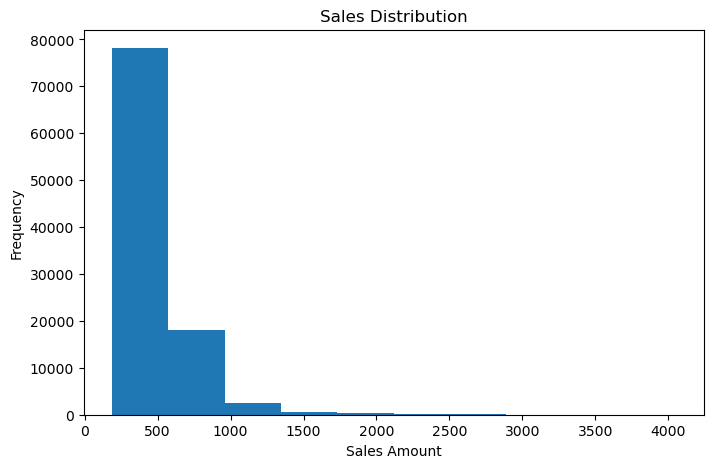

In [55]:
# Next steps
# Now that my data is clean lets do some exploratory analysis 
# Lets start off by getting an idea of the distribution of all sales (brand agnostic)

plt.figure(figsize=(8,5))
plt.hist(df['Sale Price'])
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()



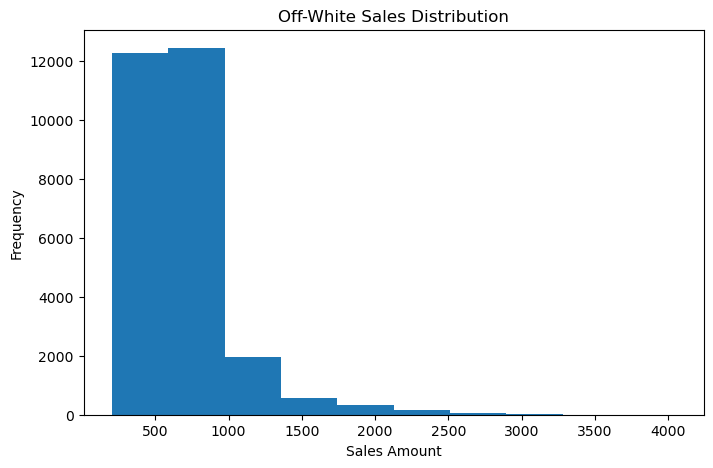

In [80]:

ow_sale_price = df[df['Brand'] == 'Off-White']['Sale Price']


plt.figure(figsize=(8,5))
plt.hist(ow_sale_price)
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Off-White Sales Distribution')
plt.show()

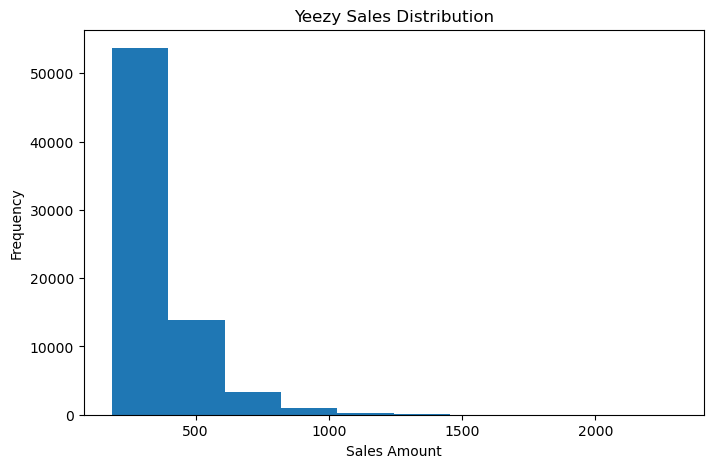

In [82]:

yeezy_sale_price = df[df['Brand'] == 'Yeezy']['Sale Price']

plt.figure(figsize=(8,5))
plt.hist(yeezy_sale_price)
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Yeezy Sales Distribution')
plt.show()

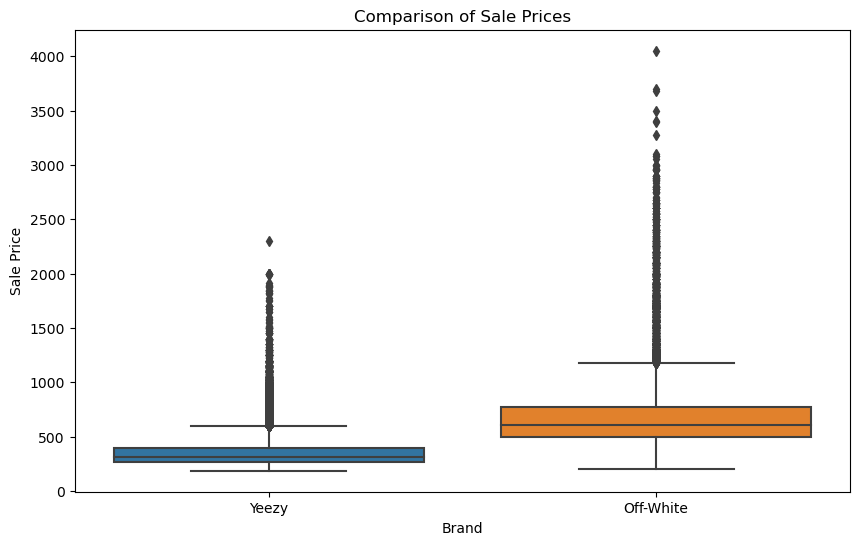

In [83]:
# Box plot of Yeezy vs Off-White
sales_by_brand = df[df['Brand'].isin(['Yeezy', 'Off-White'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Sale Price', data=sales_by_brand)
plt.title('Comparison of Sale Prices')
plt.show()

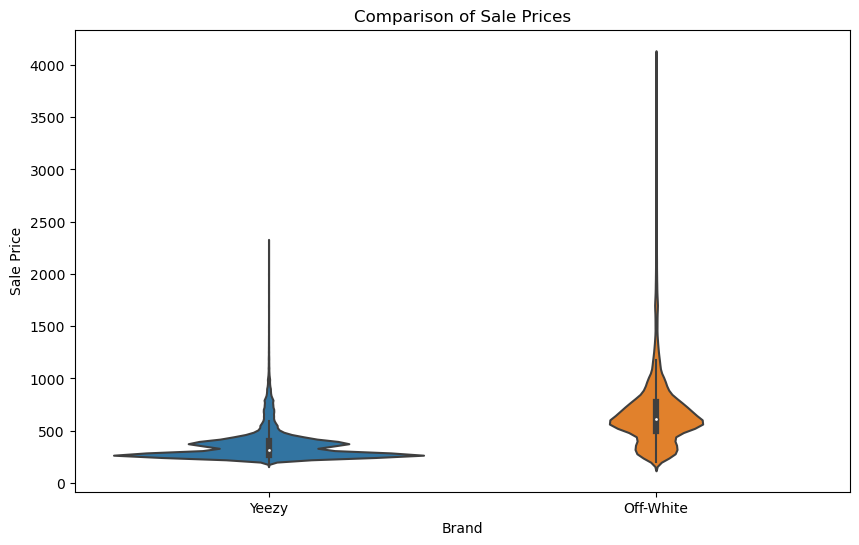

In [84]:
# Violin plot of Yeezy vs Off-White
plt.figure(figsize=(10, 6))
sns.violinplot(x='Brand', y='Sale Price', data=filtered_df)
plt.title('Comparison of Sale Prices')
plt.show()

## Data Analysis

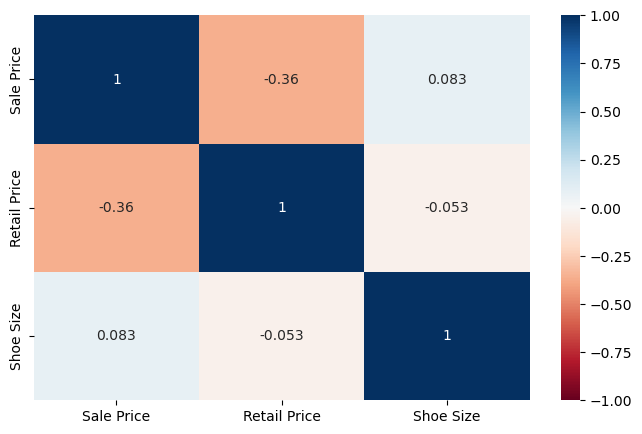

In [93]:
# Adding correlation plot
# -1 = negative correlation (red)
# 1 = positive correlation (blue)

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5)) # increased plot size for better visibility 
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1) 
plt.show()

'''

Sale Price and Retail Price: There is a negative correlation of -0.36. 
This suggests that as the retail price increases, the sale price tends to decrease, or vice versa. 
While this is counterintuitive, it's not a strong correlation, so it might not be significant enough to warrant a solid conclusion.

Sale Price and Shoe Size: The correlation is 0.083, which is very close to zero. 
This indicates a very weak positive relationship, 
meaning there's essentially no linear relationship between shoe size and sale price in your data.

Retail Price and Shoe Size: This correlation is -0.053, 
which is also very close to zero and indicates a negligible negative relationship between retail price and shoe size.

'''

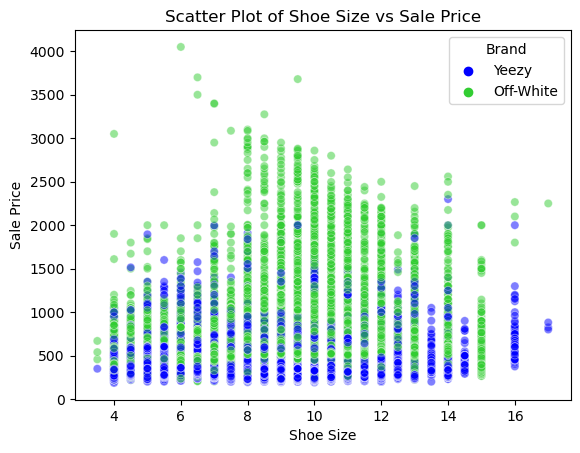

In [112]:
custom_palette = {'Yeezy': 'blue', 'Off-White': 'limegreen'}

sns.scatterplot(x='Shoe Size', y='Sale Price', data=df, hue='Brand', alpha=0.5, palette = custom_palette)
plt.title('Scatter Plot of Shoe Size vs Sale Price')
plt.show()